In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')

## Importing data and Joining Brawler Info

In [15]:
# import os
# import glob
# df_api_all = pd.read_csv('./data/brawlAPI-split/data_m.csv')
# path = os.getcwd()
# csv_files = glob.glob(os.path.join('/Users/michellecheng/Desktop/SI699/data/brawlAPI-split', "*.csv"))

# for f in csv_files:
#     df = pd.read_csv(f)
    
#     print('Location:', f)
#     print('File Name:', f.split("\\")[-1])
      
#     print('Content:')
#     df_api_all = pd.concat([df_api_all, df])
#     print()

# df_api_all.to_csv('./data/brawlAPI.csv', index = False)

In [16]:
df_api_all = pd.read_csv('./data/brawlAPI.csv')

In [17]:
df_api_all = df_api_all.iloc[:,1:].drop_duplicates()
df_api_all = df_api_all[df_api_all['power'] != -1] # remove powers that are -1

In [18]:
import json
with open('./data/brawlerInfo.json') as json_file:
    brawler_info = json.load(json_file)
brawler_info

{'8-BIT': {'Rarity': 'Super Rare',
  'Class': 'Damage Dealer',
  'MovementSpeed': '580',
  'AttackRange': '10',
  'AttackBullets': '6',
  'Reload': '1.5',
  'AttackSuperCharge': '8.48',
  'AttackSpeed': '4500',
  'AttackWidth': '0.33',
  'SuperRange': '5',
  'SuperSuperCharge': nan,
  'SuperSpeed': '1196',
  'Health': {'1': '4800',
   '2': '5040',
   '3': '5280',
   '4': '5520',
   '5': '5760',
   '6': '6000',
   '7': '6240',
   '8': '6480',
   '9': '6720',
   '10': '6960',
   '11': '7200'},
  'Attack': {'1': '320',
   '2': '336',
   '3': '352',
   '4': '368',
   '5': '384',
   '6': '400',
   '7': '416',
   '8': '432',
   '9': '448',
   '10': '464',
   '11': '480'}},
 'AMBER': {'Rarity': 'Legendary',
  'Class': 'Controller',
  'MovementSpeed': '720',
  'AttackRange': '8.33',
  'AttackBullets': '40',
  'Reload': '0.22',
  'AttackSuperCharge': '4.55',
  'AttackSpeed': '3500',
  'AttackWidth': '1.33',
  'SuperRange': '7.33',
  'SuperSuperCharge': '6.36',
  'SuperSpeed': '1750',
  'Health'

In [19]:
def get_brawler_health(row):
    name = row['name']
    power = str(row['power'])
    return brawler_info[name]['Health'][power]

def get_brawler_attack(row):
    name = row['name']
    power = str(row['power'])
    return brawler_info[name]['Attack'][power]

In [20]:
df_all = df_api_all.copy()

In [21]:
# Joining Brawler Info
info_lst = ['Rarity', 'Class', 'MovementSpeed', 'AttackRange', 'AttackBullets', 'Reload', 'AttackSuperCharge', 'AttackSpeed', 'AttackWidth','SuperRange','SuperSuperCharge','SuperSpeed']
for info in info_lst:
    if info in info_lst[2:]:
            df_all[f'{info}'] = df_all.apply(lambda x: float(brawler_info[x['name']][f'{info}']), axis =1)           
    else:
        df_all[f'{info}'] = df_all.apply(lambda x: brawler_info[x['name']][f'{info}'], axis =1)
df_all['Health'] = df_all.apply(get_brawler_health, axis = 1)
df_all['Attack'] = df_all.apply(get_brawler_attack, axis = 1)

In [23]:
df_all.to_csv('./data/all-data(raw).csv', index = False)

In [102]:
import time
date_string = time.strftime("%Y%m%d")

import boto3
s3client = boto3.client('s3')
s3client.upload_file('./data/all-data(raw).csv',  'si699-mj199-bucket', f'data/{date_string}/all-data(raw).csv')

## Data Cleaning

In [103]:
df_all = pd.read_csv('./data/all-data(raw).csv')

In [104]:
df_all = df_all.drop(columns = ['AttackBullets'])
df_all = df_all[df_all['result']!='draw']
df_all['id'] = df_all['id'].astype(str)
df_all['result'] = df_all['result'].replace({'victory': 1, 'defeat': 0}) # Labelling
# df_all = df_all.iloc[:,:-1]
df_all

,tag,result,mode,id,name,power,trophies,rank,highestTrophies,gears,...,AttackRange,Reload,AttackSuperCharge,AttackSpeed,AttackWidth,SuperRange,SuperSuperCharge,SuperSpeed,Health,Attack
0,LJ08GVUV,1,duoShowdown,16000007,JESSIE,5,291,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
1,LJ08GVUV,1,duoShowdown,16000007,JESSIE,5,284,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
2,LJ08GVUV,1,duoShowdown,16000007,JESSIE,5,282,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
3,LJ08GVUV,0,duoShowdown,16000007,JESSIE,5,284,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
4,LJ08GVUV,1,duoShowdown,16000007,JESSIE,5,277,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979053,QQJUCGCCC,0,hotZone,16000024,ROSA,6,218,14,8022,0,...,3.67,1.0,11.155,5000.0,1.0,NaN,NaN,NaN,6750,575
979054,QQJUCGCCC,1,hotZone,16000024,ROSA,6,210,14,8022,0,...,3.67,1.0,11.155,5000.0,1.0,NaN,NaN,NaN,6750,575
979055,QQJUCGCCC,1,hotZone,16000024,ROSA,6,202,14,8022,0,...,3.67,1.0,11.155,5000.0,1.0,NaN,NaN,NaN,6750,575
979056,QQJUCGCCC,1,hotZone,16000024,ROSA,6,194,14,8022,0,...,3.67,1.0,11.155,5000.0,1.0,NaN,NaN,NaN,6750,575


#### Removing Outliers

In [105]:
from scipy import stats
for i in ['trophies','highestTrophies','expLevel','expPoints','victory3vs3','soloVictories','duoVictories']:
    df_all = df_all[(np.abs(stats.zscore(df_all[[i]])) < 3).all(axis=1)]

In [106]:
df_all

,tag,result,mode,id,name,power,trophies,rank,highestTrophies,gears,...,AttackRange,Reload,AttackSuperCharge,AttackSpeed,AttackWidth,SuperRange,SuperSuperCharge,SuperSpeed,Health,Attack
0,LJ08GVUV,1,duoShowdown,16000007,JESSIE,5,291,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
1,LJ08GVUV,1,duoShowdown,16000007,JESSIE,5,284,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
2,LJ08GVUV,1,duoShowdown,16000007,JESSIE,5,282,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
3,LJ08GVUV,0,duoShowdown,16000007,JESSIE,5,284,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
4,LJ08GVUV,1,duoShowdown,16000007,JESSIE,5,277,15,7682,0,...,9.00,1.8,16.695,2870.0,1.0,5.0,6.305,1196.0,3600,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979053,QQJUCGCCC,0,hotZone,16000024,ROSA,6,218,14,8022,0,...,3.67,1.0,11.155,5000.0,1.0,NaN,NaN,NaN,6750,575
979054,QQJUCGCCC,1,hotZone,16000024,ROSA,6,210,14,8022,0,...,3.67,1.0,11.155,5000.0,1.0,NaN,NaN,NaN,6750,575
979055,QQJUCGCCC,1,hotZone,16000024,ROSA,6,202,14,8022,0,...,3.67,1.0,11.155,5000.0,1.0,NaN,NaN,NaN,6750,575
979056,QQJUCGCCC,1,hotZone,16000024,ROSA,6,194,14,8022,0,...,3.67,1.0,11.155,5000.0,1.0,NaN,NaN,NaN,6750,575


#### Getting only the newest data from each user's brawler

In [107]:
df_all = df_all.drop(columns = ['id'])
df_all = df_all.groupby(['tag','name','mode']).head(1)

In [108]:
df_all

,tag,result,mode,name,power,trophies,rank,highestTrophies,gears,starPowers,...,AttackRange,Reload,AttackSuperCharge,AttackSpeed,AttackWidth,SuperRange,SuperSuperCharge,SuperSpeed,Health,Attack
0,LJ08GVUV,1,duoShowdown,JESSIE,5,291,15,7682,0,0,...,9.00,1.8,16.695,2870.0,1.00,5.00,6.305,1196.0,3600,1272
17,LJ08GVUV,1,duoShowdown,EMZ,9,503,20,7682,0,0,...,6.67,2.0,11.180,1500.0,1.33,5.67,4.560,NaN,5040,728
25,2P0QPY080,1,brawlBall,DYNAMIKE,9,620,23,31593,0,2,...,7.33,1.6,25.000,1900.0,NaN,7.33,50.050,1600.0,3920,1120
27,2P0QPY080,0,brawlBall,MORTIS,9,527,24,31593,0,1,...,2.67,2.4,20.025,NaN,NaN,10.00,30.150,2718.0,5320,1260
31,2P0QPY080,0,brawlBall,PENNY,9,548,23,31593,0,2,...,8.00,2.0,21.855,3400.0,1.00,5.00,30.000,1196.0,5040,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979033,QQJUCGCCC,0,hotZone,STU,7,228,13,8022,0,0,...,7.67,1.5,100.000,3300.0,1.00,2.33,NaN,NaN,3770,702
979037,QQJUCGCCC,0,hotZone,BROCK,5,232,13,8022,0,0,...,9.00,2.1,26.100,2700.0,0.67,8.33,20.800,870.0,2880,1392
979041,QQJUCGCCC,1,hotZone,ROSA,6,254,14,8022,0,0,...,3.67,1.0,11.155,5000.0,1.00,NaN,NaN,NaN,6750,575
979051,QQJUCGCCC,0,brawlBall,STU,7,218,13,8022,0,0,...,7.67,1.5,100.000,3300.0,1.00,2.33,NaN,NaN,3770,702


#### Replacing Null Values

In [76]:
def replace_null(data):
    if math.isnan(data):
        return 0
    else:
        return data

In [111]:
# df_all['SuperSpeed'] = df_all['SuperSpeed'].apply(replace_null)
# df_all['AttackSpeed'] = df_all['AttackSpeed'].apply(replace_null)
# df_all['Reload'] = df_all['Reload'].apply(replace_null)
# df_all['AttackWidth'] = df_all['AttackWidth'].apply(replace_null)
# df_all['SuperRange'] = df_all['SuperRange'].apply(replace_null)
# df_all['SuperSuperCharge'] = df_all['SuperSuperCharge'].apply(replace_null)

In [78]:
df_all

,tag,result,mode,name,power,trophies,rank,highestTrophies,gears,starPowers,...,AttackRange,Reload,AttackSuperCharge,AttackSpeed,AttackWidth,SuperRange,SuperSuperCharge,SuperSpeed,Health,Attack
0,LJ08GVUV,1,duoShowdown,JESSIE,5,291,15,7682,0,0,...,9.00,1.8,16.695,2870.0,1.00,5.00,6.305,1196.0,3600,1272
17,LJ08GVUV,1,duoShowdown,EMZ,9,503,20,7682,0,0,...,6.67,2.0,11.180,1500.0,1.33,5.67,4.560,0.0,5040,728
25,2P0QPY080,1,brawlBall,DYNAMIKE,9,620,23,31593,0,2,...,7.33,1.6,25.000,1900.0,0.00,7.33,50.050,1600.0,3920,1120
27,2P0QPY080,0,brawlBall,MORTIS,9,527,24,31593,0,1,...,2.67,2.4,20.025,0.0,0.00,10.00,30.150,2718.0,5320,1260
31,2P0QPY080,0,brawlBall,PENNY,9,548,23,31593,0,2,...,8.00,2.0,21.855,3400.0,1.00,5.00,30.000,1196.0,5040,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979033,QQJUCGCCC,0,hotZone,STU,7,228,13,8022,0,0,...,7.67,1.5,100.000,3300.0,1.00,2.33,0.000,0.0,3770,702
979037,QQJUCGCCC,0,hotZone,BROCK,5,232,13,8022,0,0,...,9.00,2.1,26.100,2700.0,0.67,8.33,20.800,870.0,2880,1392
979041,QQJUCGCCC,1,hotZone,ROSA,6,254,14,8022,0,0,...,3.67,1.0,11.155,5000.0,1.00,0.00,0.000,0.0,6750,575
979051,QQJUCGCCC,0,brawlBall,STU,7,218,13,8022,0,0,...,7.67,1.5,100.000,3300.0,1.00,2.33,0.000,0.0,3770,702


## Exploratory Data Analysis

In [84]:
print(f"Number of unique players: {df_all['tag'].nunique()}")

Number of unique players: 41161


#### Label Distribution

In [85]:
# Label Distribution
df_all['result'].value_counts()

1    136791
0    117860
Name: result, dtype: int64

In [86]:
df_all['result'].value_counts()[0]/df_all['result'].value_counts()[1]

0.8616063922334072

#### Categorical Features

In [87]:
print(df_all['mode'].value_counts())
print('\n')
print(df_all['name'].value_counts())
print('\n')
print(df_all['Rarity'].value_counts())
print('\n')
print(df_all['Class'].value_counts())

duoShowdown     70576
soloShowdown    52061
brawlBall       41273
knockout        32965
gemGrab         24199
hotZone         20568
bounty           6940
heist            6069
Name: mode, dtype: int64


EDGAR       9642
DYNAMIKE    7698
SHELLY      6835
EMZ         6593
EL PRIMO    6229
            ... 
EVE         1731
AMBER       1722
SANDY       1248
BUSTER      1224
MEG          942
Name: name, Length: 64, dtype: int64


Epic                62601
Chromatic           47348
Super Rare          45816
Rare                39273
Mythic              32807
Legendary           19971
Starting Brawler     6835
Name: Rarity, dtype: int64


Damage Dealer    71276
Assassin         41311
Tank             34579
Support          28340
Controller       27014
Artillery        26326
Marksman         25805
Name: Class, dtype: int64


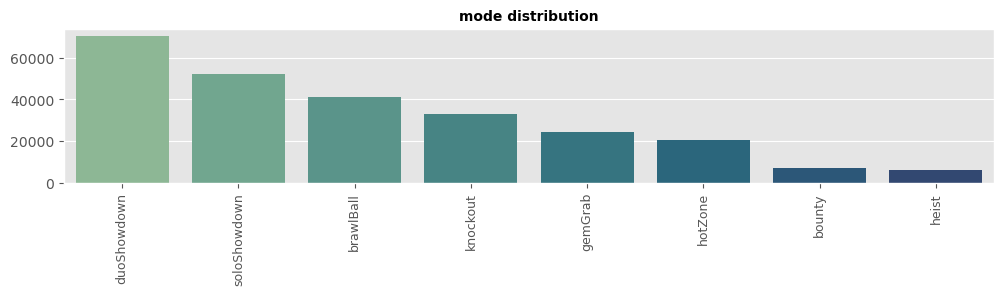

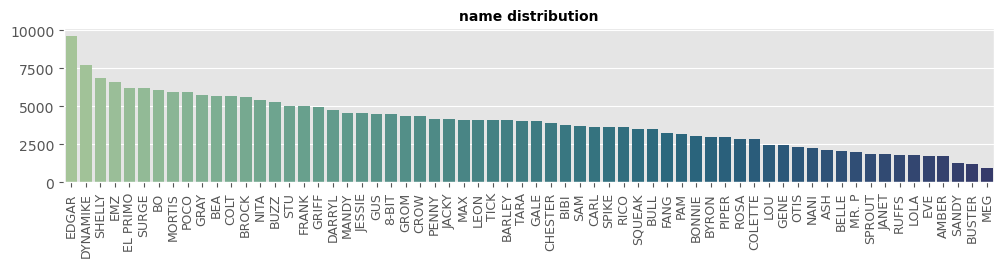

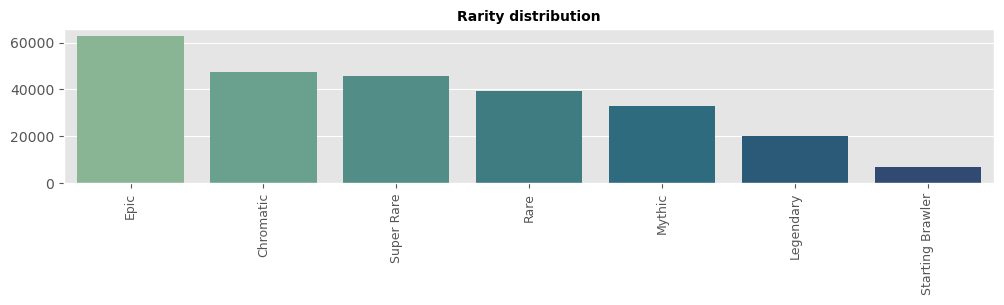

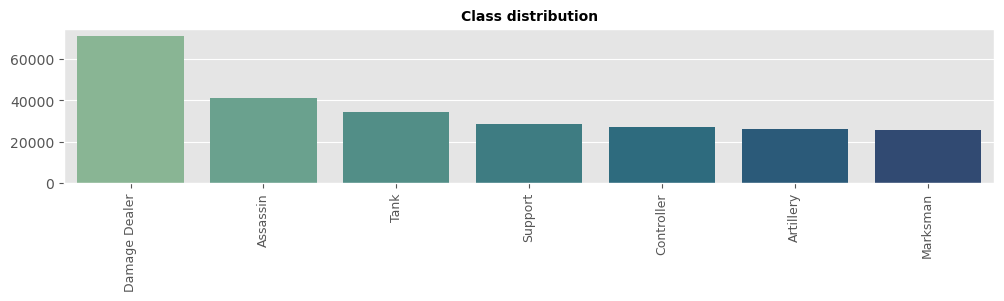

In [88]:
for i in ['mode','name','Rarity','Class']:
    plt.figure(figsize=(12,2))
    feature = df_all[i].value_counts().index
    count = df_all[i].value_counts().to_list()
    sns.barplot(x = feature, y = count, palette = 'crest')
    plt.xticks(rotation=90, size = 9)
    plt.title(f'{i} distribution', size = 10, weight = 'bold')
    plt.show()

#### Numerical Features

In [89]:
df_all.describe()

,result,power,trophies,rank,highestTrophies,gears,starPowers,gadgets,expLevel,expPoints,...,AttackRange,Reload,AttackSuperCharge,AttackSpeed,AttackWidth,SuperRange,SuperSuperCharge,SuperSpeed,Health,Attack
count,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,...,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000,254651.000000
mean,0.537170,7.542861,329.667439,15.680327,15437.845663,0.198106,0.442386,0.927136,96.187351,60115.420929,...,7.122751,1.517846,18.223444,3074.983876,0.694701,8.126021,14.080068,1885.595246,4736.595556,923.014738
std,0.498617,2.160998,188.991819,5.358333,8482.687783,0.695914,0.738808,0.862307,46.877455,51368.561832,...,2.342005,0.476697,14.424673,1195.060189,0.584315,6.439983,14.714653,1701.453848,1394.769231,448.535839
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,3.787500,0.000000,0.000000,0.000000,0.000000,0.000000,2200.000000,200.000000
25%,0.000000,7.000000,179.000000,12.000000,8899.500000,0.000000,0.000000,0.000000,63.000000,21483.000000,...,6.000000,1.300000,8.400000,2718.000000,0.270000,5.000000,0.000000,0.000000,3770.000000,510.000000
50%,1.000000,8.000000,326.000000,16.000000,15505.000000,0.000000,0.000000,1.000000,93.000000,45588.000000,...,7.670000,1.600000,16.670000,3261.000000,0.670000,7.670000,8.960000,1600.000000,4420.000000,840.000000
75%,1.000000,9.000000,498.000000,20.000000,21835.000000,0.000000,1.000000,2.000000,128.000000,85603.000000,...,9.000000,1.900000,25.000000,4000.000000,1.000000,9.000000,25.000000,3200.000000,5375.000000,1272.000000
max,1.000000,11.000000,947.000000,35.000000,46110.000000,6.000000,2.000000,2.000000,242.000000,298974.000000,...,10.000000,2.400000,100.000000,5000.000000,2.000000,40.000000,50.050000,6000.000000,10500.000000,2100.000000


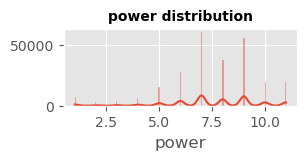

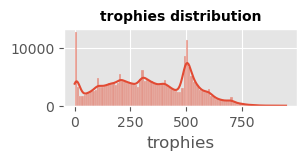

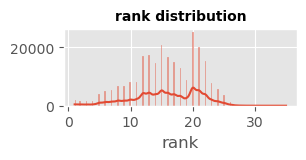

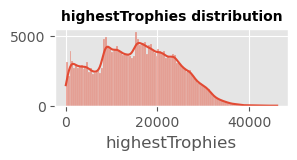

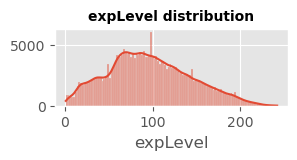

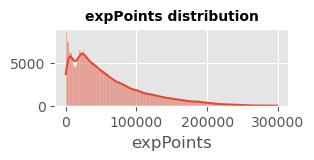

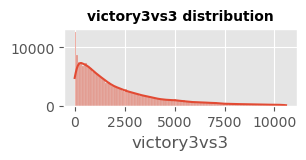

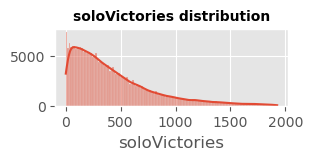

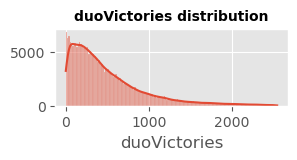

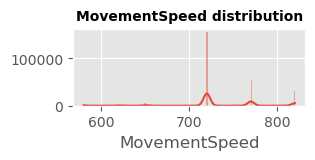

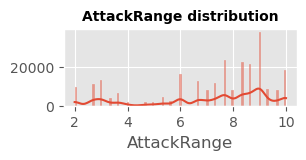

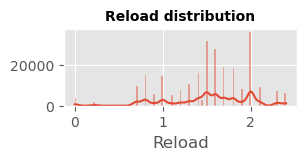

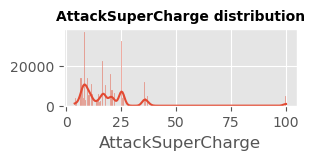

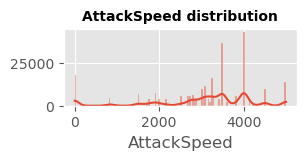

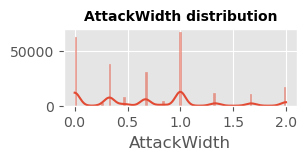

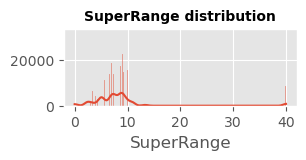

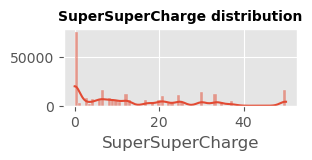

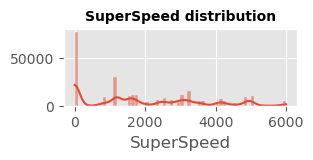

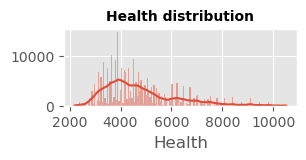

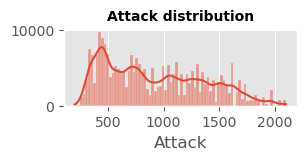

In [97]:
# Distribution of Numerical Features
lst = ['power', 'trophies', 'rank', 'highestTrophies', 'expLevel', 'expPoints', 'victory3vs3',
'soloVictories', 'duoVictories', 'MovementSpeed', 'AttackRange','Reload', 'AttackSuperCharge', 'AttackSpeed', 'AttackWidth',
'SuperRange', 'SuperSuperCharge', 'SuperSpeed', 'Health', 'Attack']

for i in lst:
    plt.figure(figsize=(3,1))
    sns.histplot(data = df_all, x = i, kde = True)
    plt.ylabel('')
    plt.title(f'{i} distribution', size = 10, weight = 'bold')
    plt.show()

/var/folders/wy/gmfr1dfd72d5g9h5r030cm6m0000gn/T/ipykernel_65996/453016277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_all.corr(), cmap = sns.cm.rocket_r, vmin=-1, vmax=1)


<AxesSubplot: >

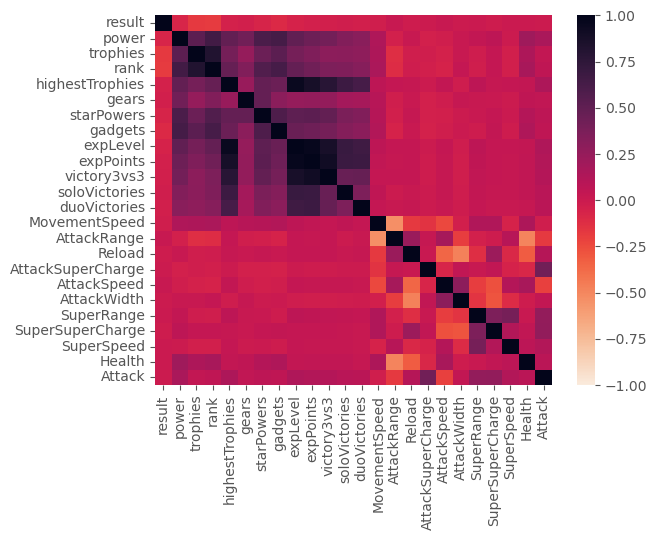

In [14]:
# Correlation Between Features
sns.heatmap(df_all.corr(), cmap = sns.cm.rocket_r, vmin=-1, vmax=1)
# sns.heatmap(df_all.corr()>0.9)

Many player-specific data are highly correlated, this may cause Multicollinearity which may lead to issues when using Logistic Regression and KNN. SVM, Decision Trees, and Random Forests are more immune to Multicollinearity.
Some highly correlated variables (correlation coefficient > 0.9):
- expLevel v.s expPoints
- expLevel v.s highestTrophies
- victory3vs3 v.s expPoints

#### Variance Inflation Factor (VIF)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_all[df_all.corr().columns]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
print(vif_data)

/var/folders/wy/gmfr1dfd72d5g9h5r030cm6m0000gn/T/ipykernel_65996/197088341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = df_all[df_all.corr().columns]


              feature         VIF
8            expLevel  212.136899
9           expPoints  145.008514
13      MovementSpeed   70.331942
4     highestTrophies   57.748011
3                rank   43.358271
10        victory3vs3   40.645320
1               power   34.463967
22             Health   19.629115
15             Reload   17.912787
14        AttackRange   14.849313
2            trophies   13.063692
11      soloVictories   12.107314
17        AttackSpeed   11.880075
12       duoVictories    9.025758
23             Attack    8.597820
7             gadgets    4.733178
19         SuperRange    4.095701
18        AttackWidth    3.725278
16  AttackSuperCharge    3.371264
6          starPowers    3.157296
21         SuperSpeed    2.897942
20   SuperSuperCharge    2.593337
0              result    2.248030
5               gears    1.501907


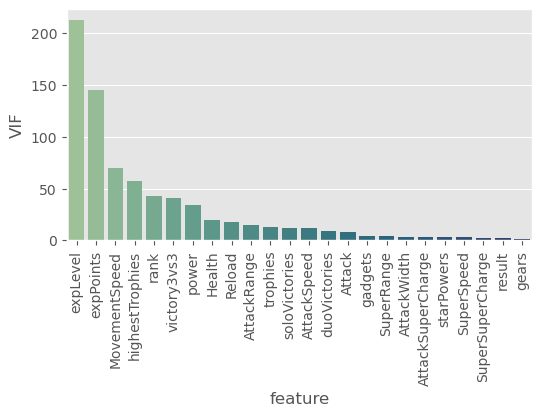

In [39]:
plt.figure(figsize=(6,3))
sns.barplot(vif_data, x = 'feature', y = 'VIF', palette = 'crest')
plt.xticks(rotation=90)
plt.show()

## Exporting Cleaned Data

In [109]:
df_all.to_csv('./data/all_data(cleaned).csv', index = False)

In [110]:
df = pd.read_csv('./data/all_data(cleaned).csv')
df

,tag,result,mode,name,power,trophies,rank,highestTrophies,gears,starPowers,...,AttackRange,Reload,AttackSuperCharge,AttackSpeed,AttackWidth,SuperRange,SuperSuperCharge,SuperSpeed,Health,Attack
0,LJ08GVUV,1,duoShowdown,JESSIE,5,291,15,7682,0,0,...,9.00,1.8,16.695,2870.0,1.00,5.00,6.305,1196.0,3600,1272
1,LJ08GVUV,1,duoShowdown,EMZ,9,503,20,7682,0,0,...,6.67,2.0,11.180,1500.0,1.33,5.67,4.560,NaN,5040,728
2,2P0QPY080,1,brawlBall,DYNAMIKE,9,620,23,31593,0,2,...,7.33,1.6,25.000,1900.0,NaN,7.33,50.050,1600.0,3920,1120
3,2P0QPY080,0,brawlBall,MORTIS,9,527,24,31593,0,1,...,2.67,2.4,20.025,NaN,NaN,10.00,30.150,2718.0,5320,1260
4,2P0QPY080,0,brawlBall,PENNY,9,548,23,31593,0,2,...,8.00,2.0,21.855,3400.0,1.00,5.00,30.000,1196.0,5040,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254646,QQJUCGCCC,0,hotZone,STU,7,228,13,8022,0,0,...,7.67,1.5,100.000,3300.0,1.00,2.33,NaN,NaN,3770,702
254647,QQJUCGCCC,0,hotZone,BROCK,5,232,13,8022,0,0,...,9.00,2.1,26.100,2700.0,0.67,8.33,20.800,870.0,2880,1392
254648,QQJUCGCCC,1,hotZone,ROSA,6,254,14,8022,0,0,...,3.67,1.0,11.155,5000.0,1.00,NaN,NaN,NaN,6750,575
254649,QQJUCGCCC,0,brawlBall,STU,7,218,13,8022,0,0,...,7.67,1.5,100.000,3300.0,1.00,2.33,NaN,NaN,3770,702


### Loading to S3 Bucket

In [100]:
!aws s3 ls

2023-02-13 13:14:50 si699-mj199-bucket


In [101]:
import time
date_string = time.strftime("%Y%m%d")

import boto3
s3client = boto3.client('s3')
s3client.upload_file('./data/all_data(cleaned).csv',  'si699-mj199-bucket', f'data/{date_string}/all_data(cleaned).csv')

## Optional: Importing Data from Database

In [2]:
# ### Connecting to AWS RDS

# import psycopg2
# import psycopg2.extras as extras

# PGHOST = 'mj199-database.cfk5zj0ywdiy.us-east-1.rds.amazonaws.com'
# PGDATABASE = 'brawl_stars_db'
# PGUSER = 'postgres'
# PGPASSWORD = 'mj199mj199'

# def connect():
    
#     # Set up a connection to the postgres server.
#     conn_string = "host="+ PGHOST +" port="+ "5432" +" dbname="+ PGDATABASE +" user=" + PGUSER \
#                   +" password="+ PGPASSWORD
    
#     conn = psycopg2.connect(conn_string)
#     print("Connected!")

#     # Create a cursor object
#     cursor = conn.cursor()
    
#     return conn, cursor

# conn, cursor = connect()

Connected!


In [3]:
# ### Querying Data

# query = '''
# SELECT 
#     a.*, "Rarity", "Class", "MovementSpeed", "AttackRange", "AttackBullets", 
#     "Reload", "AttackSuperCharge", "AttackSpeed", "AttackWidth", "SuperRange",
#     "SuperSuperCharge", "SuperSpeed", "Attack", "Health", a.load_timestamp
# FROM "brawl_api_data" a
# JOIN "brawler_info" i
#     ON a.name = i.name
# JOIN "brawler_health_attack" h
#     ON a.name = h.name AND a.power = h.power
# WHERE DATE(a.load_timestamp) = DATE(i.load_timestamp) 
#     AND DATE(i.load_timestamp) = DATE(h.load_timestamp)
# '''
# df_all = pd.read_sql(query, con=conn)
# df_all

/tmp/ipykernel_119050/3526102028.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all = pd.read_sql(query, con=conn)


,tag,result,mode,id,name,power,trophies,rank,highestTrophies,gears,...,Reload,AttackSuperCharge,AttackSpeed,AttackWidth,SuperRange,SuperSuperCharge,SuperSpeed,Attack,Health,load_timestamp
0,8JLR2R82,defeat,brawlBall,16000034,JACKY,9,680,23,25155,0,...,1.8,25.28,NaN,NaN,5.0,NaN,NaN,1736.0,7000.0,2023-02-24 06:14:49.426470
1,8JLR2R82,victory,brawlBall,16000034,JACKY,9,672,23,25155,0,...,1.8,25.28,NaN,NaN,5.0,NaN,NaN,1736.0,7000.0,2023-02-24 06:14:49.426470
2,8JLR2R82,victory,brawlBall,16000034,JACKY,9,664,23,25155,0,...,1.8,25.28,NaN,NaN,5.0,NaN,NaN,1736.0,7000.0,2023-02-24 06:14:49.426470
3,8JLR2R82,victory,brawlBall,16000034,JACKY,9,656,23,25155,0,...,1.8,25.28,NaN,NaN,5.0,NaN,NaN,1736.0,7000.0,2023-02-24 06:14:49.426470
4,8JLR2R82,victory,brawlBall,16000034,JACKY,9,648,23,25155,0,...,1.8,25.28,NaN,NaN,5.0,NaN,NaN,1736.0,7000.0,2023-02-24 06:14:49.426470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,QCJV80GQQ,victory,heist,16000049,BUZZ,9,756,26,16954,0,...,1.0,10.08,4000.0,1.0,10.0,NaN,3500.0,588.0,6160.0,2023-02-24 06:14:49.426470
9540,QCJV80GQQ,victory,heist,16000049,BUZZ,9,748,26,16954,0,...,1.0,10.08,4000.0,1.0,10.0,NaN,3500.0,588.0,6160.0,2023-02-24 06:14:49.426470
9541,QCJV80GQQ,victory,heist,16000049,BUZZ,9,740,26,16954,0,...,1.0,10.08,4000.0,1.0,10.0,NaN,3500.0,588.0,6160.0,2023-02-24 06:14:49.426470
9542,QCJV80GQQ,victory,heist,16000049,BUZZ,9,732,26,16954,0,...,1.0,10.08,4000.0,1.0,10.0,NaN,3500.0,588.0,6160.0,2023-02-24 06:14:49.426470
